    valores de fi:  [ 800 2310 3090 3940 4755]
divisores en L(i):  [-2.  2.]

Polinomio de Lagrange, expresiones
755*x + 45

Polinomio de Lagrange: 
755*x + 45


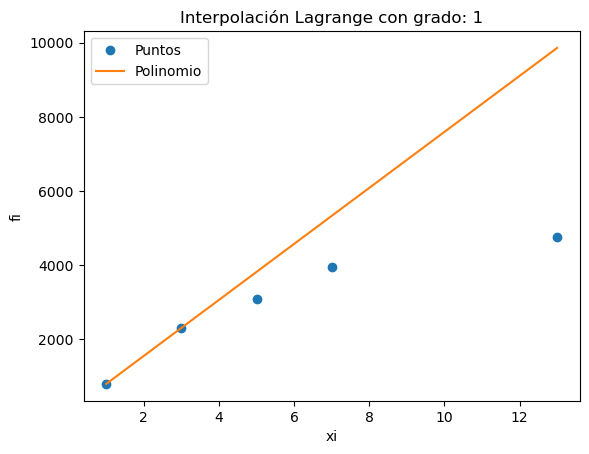

In [1]:
# Interpolacion de Lagrange
# divisores L solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
# xi = np.array([0, 0.2, 0.3, 0.4])
# fi = np.array([1, 1.6, 1.7, 2.0])
xi = np.array([1,3,5,7,13])
fi = np.array([800, 2310, 3090, 3940, 4755])


# Polinomio de Lagrange
# PROCEDIMIENTO
#n = len(xi)
n = 2
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador
    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange con grado: ' + str(n-1))
plt.show()